In [ ]:
##Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal as mvn
import seaborn as sns


In [ ]:
class GaussNB():

    def fit(self, X, y, epsilon = 0.5e-1): 
        self.likelihoods = dict()
        self.priors = dict()

        self.K = set(y.astype(int))

        for k in self.K:
    
            X_k =X[y==k,:]


            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":X_k.var(axis=0) + epsilon }
            self.priors[k]=len(X_k)/len(X)

    def predict(self, X):

        N, D = X.shape

        P_hat = np.zeros((N,len(self.K)))

        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"])+ np.log(self.priors[k]) 
  
        return P_hat.argmax(axis=1)

In [ ]:
### Multiclasses classifier, works with any number of classes(categories)
class GaussBayes():
    
    def fit(self, X,y, epsilon=0.5e-1):
        self.likelihoods = dict()
        self.priors = dict()
        ###for categorical values use onehtencoder
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y==k,:]
            N_k,D = X_k.shape   ## N_k=total number of observations of that class
            mu_k = X_k.mean(axis=0)
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov": (1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+ epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
    
    
    def predict(self, X):
        N,D = X.shape
        P_hat = np.zeros((N,len(self.K)))
        
        for k,l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X,l["mean"], l["cov"])+np.log(self.priors[k])
        
        return P_hat.argmax(axis=1)

In [ ]:
class KNNClassifier():
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X, K, epsilon=0.5e-1):
        N = len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K] 
            gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon)) 
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()  ### 
            
        return y_hat

In [ ]:
def show_me(X):
    plt.imshow(X.reshape(28,28))
    
def show_me_allmean(X,y,k):
    show_me(sum(X[y==k,:]/len(X[y==k,:])))

def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [ ]:
## import train data
df = pd.read_csv('/content/MNIST_train.csv', index_col=1)
d = dict.fromkeys(df.select_dtypes(np.int64).columns, np.int32)
df = df.astype(d)

## import test data 
test = pd.read_csv('/content/MNIST_test.csv')
y_test = test['labels']
test = test.drop(columns=['Unnamed: 0', 'index', 'labels'])

X_test = test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
### For knn runn cell 
df = df.head(45000)

In [ ]:
## Define X and y 
y = df['labels']
X = df.drop(columns=['Unnamed: 0', 'labels'])


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: int32(784)
memory usage: 179.9 MB


In [ ]:
### check 
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002100,0.007833,0.003600,0.000150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000267,0.000917,0.009283,0.024283,0.043717,0.06410,0.120133,0.160733,...,3.534933,2.591817,1.701167,1.008600,0.540283,0.238400,0.075267,0.016167,0.000517,0.000983,0.0,0.0,0.0,0.0,0.0,0.0,0.002533,0.015583,0.041633,0.089200,0.128217,0.196733,0.336017,0.429967,0.525983,0.590683,0.688033,0.592067,0.482733,0.343517,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475324,1.361189,0.881816,0.036742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065320,0.194636,1.055011,2.095113,2.962063,3.32388,4.869298,5.529033,...,26.101169,22.251302,18.107058,13.897102,10.317854,6.552565,3.500306,1.241759,0.114964,0.240866,0.0,0.0,0.0,0.0,0.0,0.0,0.437527,1.721198,2.601220,4.032627,4.776047,6.177880,7.680724,9.093559,9.898373,10.431982,11.403013,10.517303,9.397896,8.057733,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000

In [ ]:
## Normalize
X = X/255
X_test = X_test/255

In [ ]:
## X and y as numpy arrays to fit the model
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y

array([5, 0, 4, ..., 5, 6, 8], dtype=int32)

## GaussNB

In [ ]:
gsn = GaussNB()

In [ ]:
gsn.fit(X,y)

In [ ]:
y_hat_gsn = gsn.predict(X)

In [ ]:
y_test_gsn = gsn.predict(X_test)

In [ ]:
#accuracy train
accuracy(y, y_hat_gsn)

0.7884666666666666

In [ ]:
#accuracy test
accuracy(y_test, y_test_gsn)

0.8013

Text(0.5, 42.0, 'Predicted label')

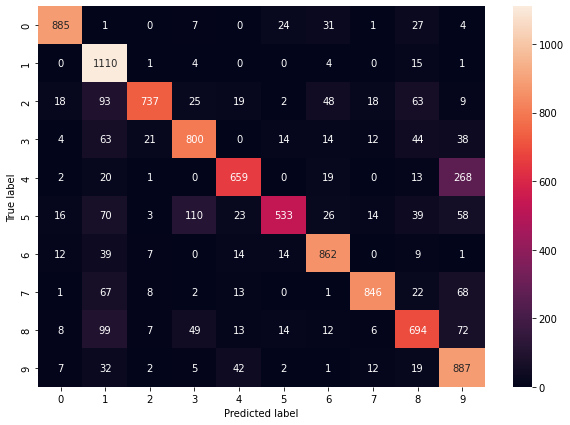

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_gsn, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 42.0, 'Predicted label')

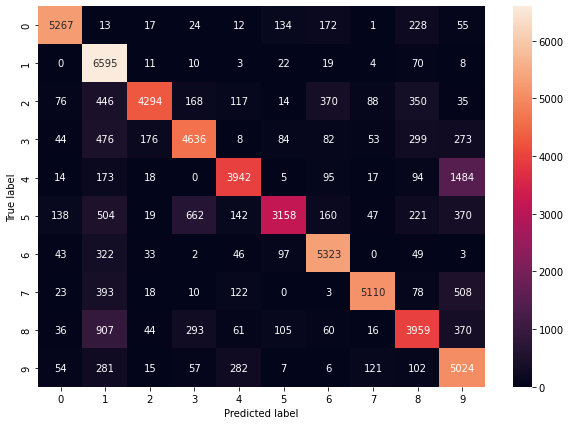

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat_gsn, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

## GaussBayes

In [ ]:
GB = GaussBayes()

In [ ]:
GB.fit(X,y)

In [ ]:
y_hat_GB = GB.predict(X)

In [ ]:
y_test_GB_hat = GB.predict(X_test)

In [ ]:
#accuracy train
accuracy(y, y_hat_GB)

0.9592

In [ ]:
# accuracy test
accuracy(y_test, y_test_GB_hat)

0.9563

Text(0.5, 42.0, 'Predicted label')

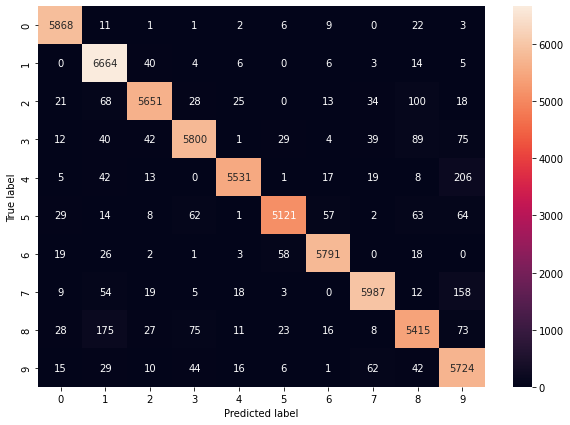

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat_GB, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 42.0, 'Predicted label')

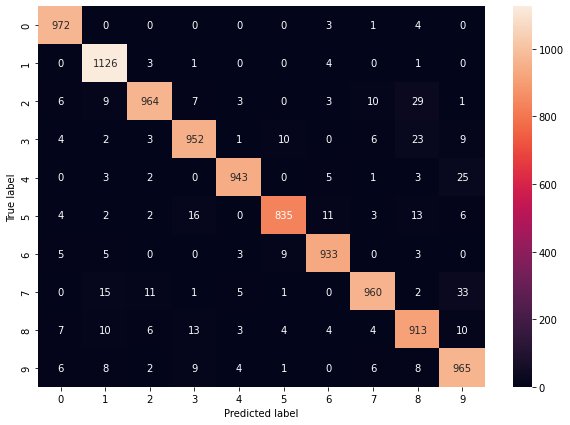

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_GB_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

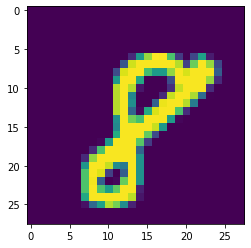

In [ ]:
show_me(X[8313])

In [ ]:
X

array([[ 1.90756726,  0.32586513],
       [ 2.27054368,  2.25881652],
       [ 2.32308573,  1.46660143],
       ...,
       [ 3.0596909 , -2.87353245],
       [ 3.52560718, -2.33106954],
       [ 1.72005898, -1.13464011]])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
y[100]

5

## KNN Classifier

In [ ]:
knn = KNNClassifier()

In [ ]:
knn.fit(X,y)

In [ ]:
y_hat_knn = knn.predict(X,10)

In [ ]:
accuracy(y, y_hat_knn)

0.9999451934670612

In [ ]:
y_hat_knn_test = knn.predict(X_test,10)

In [ ]:
accuracy(y_test, y_hat_knn_test)

0.9545